In [1]:
from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterFull"]
mycol = mydb["s_m_a_r_t_att_full"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "_id":0}   <---- current one
myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "n_b_written":1, "w_r_d":1, "_id":0}

mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)
#mydocSMARTAtt = mycol.find(myquerySMARTAtt)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# %%
dfSMARTAtt["model_y"] = "B2"

# %%
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [ ]:
## Saving spllited values into a csv file

model= "B2"

result.to_csv('SplittedDatasetSSD/' + 'extractedattributes' + model + '.csv')

In [ ]:
# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["OverTimeSSDsFailures"]
mycol = mydb["over_time_s_s_ds_failures"]

myqueryFailureTime = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
myfieldsFailureTime = {"disk_id":1, "failure_time":1, "_id":0}

mydocFailureTime = mycol.find(myqueryFailureTime, myfieldsFailureTime)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listFailureTime = list(mydocFailureTime)
dfFailureTime =  pd.DataFrame(listFailureTime)

# %%
dfFailureTime["model_y"] = "B2"

# %%
resultSSDFailures = pd.merge(dfFailureTime, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [ ]:
## Saving spllited values into a csv file

model= "B2"

resultSSDFailures.to_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [2]:
# Wheter it is necessary to load the files created above

model= "B2"

result = pd.read_csv('../../../../Downloads/' + 'extractedattributes' + model + '.csv')
resultSSDFailures = pd.read_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008712 entries, 0 to 31008711
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0.1  int64  
 1   Unnamed: 0    int64  
 2   disk_id       float64
 3   timestamp     object 
 4   r_sectors     float64
 5   n_b_written   float64
 6   w_r_d         float64
 7   model_y       object 
 8   app           object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.1+ GB


In [59]:
resultSSDFailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    604 non-null    int64  
 1   disk_id       604 non-null    float64
 2   failure_time  604 non-null    object 
 3   model_y       604 non-null    object 
 4   app           604 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 23.7+ KB


In [7]:
result.w_r_d.max()

7206.0

In [8]:
# REMOVE ZERO VALUES AS THEY ARE AFFECTING THE KDE RESULTS

result.drop(result[result.w_r_d < 10].index, inplace=True)
result.drop(result[result.w_r_d > 7206].index, inplace=True)

In [9]:
result.drop(result[result.w_r_d > 3000].index, inplace=True)

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

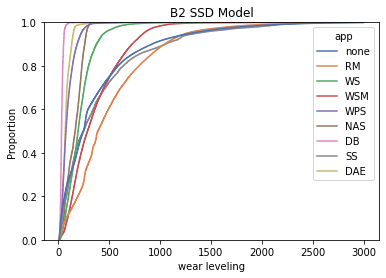

In [7]:
graph = sns.ecdfplot(x = "w_r_d", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", title ='B2 SSD Model')

In [ ]:
result.drop(result[result.r_errors < 10].index, inplace=True)

[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

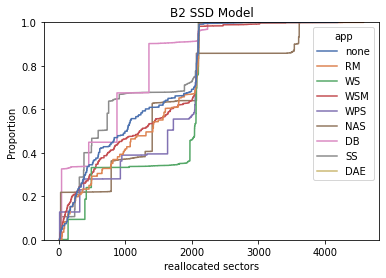

In [11]:
# removing < 10

graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

In [ ]:
result.loc[result["app"] == "WS", "u_errors"].max()

In [ ]:
result.drop(result[result.u_errors < 1].index, inplace=True)

[Text(0.5, 0, 'Uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

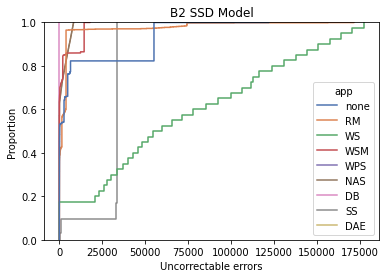

In [14]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

graph = sns.ecdfplot(x = "u_errors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Uncorrectable errors", title ='B2 SSD Model')

In [18]:
result.loc[result["app"] == "DB", "p_failedB"].max()

2095.0

In [5]:
result.drop(result[result.p_failedB < 1].index, inplace=True)
result.drop(result[result.p_failedB >2103].index, inplace=True)

[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

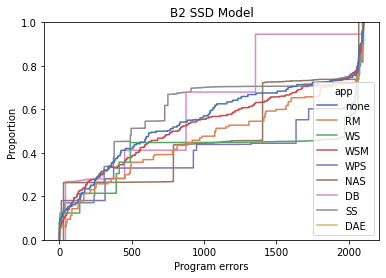

In [16]:
graph = sns.ecdfplot(x = "p_failedB", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

In [2]:
maxW = result.n_b_written.max()

In [3]:
result.drop(result[result.n_b_written < 1].index, inplace=True)
result.drop(result[result.n_b_written > maxW].index, inplace=True)

In [9]:
result.drop(result[result.n_b_written > 5992942384941].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

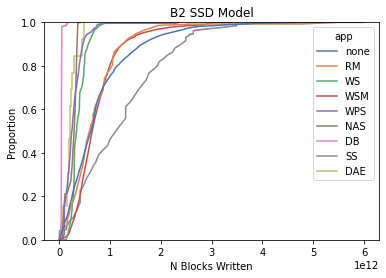

In [10]:
graph = sns.ecdfplot(x = "n_b_written", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

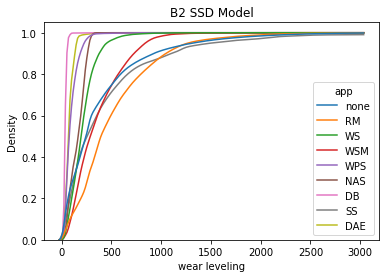

In [8]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

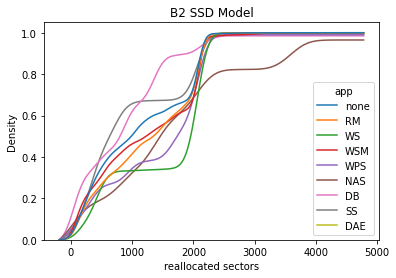

In [13]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

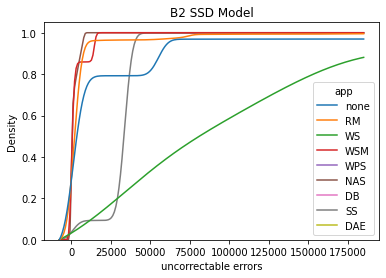

In [15]:
graph = sns.kdeplot(
    data=result, x="u_errors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "uncorrectable errors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

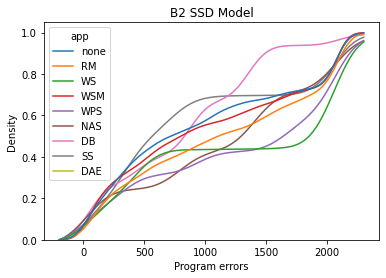

In [19]:
graph = sns.kdeplot(
    data=result, x="p_failedB", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

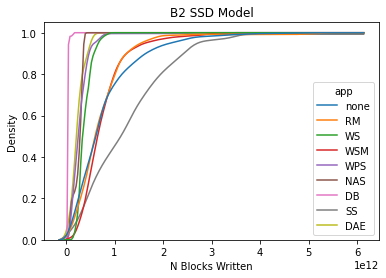

In [11]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

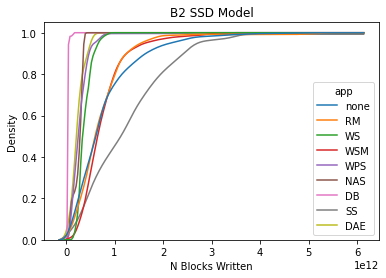

In [7]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

### APPROACH USING GROUPY BASED ON TIMESTAMP

N Blocks written x Program Errors

In [ ]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['p_failedB', 'n_b_written'].mean()

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Program errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

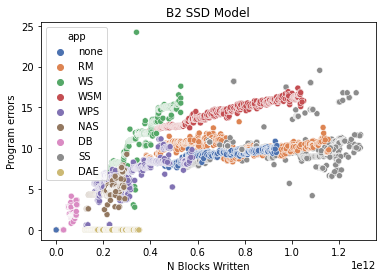

In [9]:
graph = sns.scatterplot(x = "n_b_written", y = 'p_failedB', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

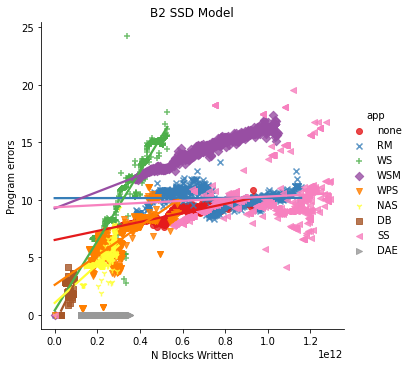

In [11]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

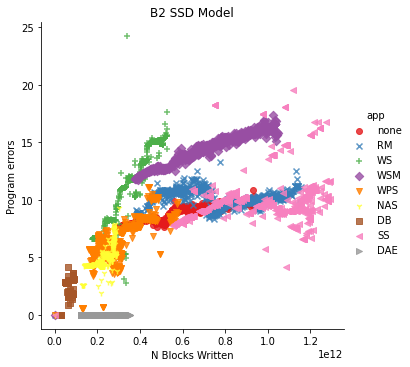

In [12]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

Wear Leveling x Time

In [5]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['w_r_d'].mean()

In [ ]:
graph = sns.scatterplot(x = "timestamp", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "Wear Leveling Count", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

N Blocks written x Wear Leveling

In [18]:
## group per day (daily mean) - per app

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'w_r_d'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/52250810.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'w_r_d'].mean()


In [8]:
result.head()

,Unnamed: 0.1,Unnamed: 0,disk_id,timestamp,r_sectors,n_b_written,w_r_d,model_y,app
0,0,0,19207.0,2018-01-01,NaN,NaN,NaN,B2,none
1,1,1,19207.0,2018-01-02,NaN,NaN,NaN,B2,none
2,2,2,19207.0,2018-01-03,0.0,5.084690e+09,3.0,B2,none
3,3,3,19207.0,2018-01-04,0.0,5.084690e+09,3.0,B2,none
4,4,4,19207.0,2018-01-05,0.0,5.084690e+09,3.0,B2,none


In [16]:
## group per day (daily mean) - withou consider app

group = result.groupby(['timestamp'], as_index=False)['n_b_written', 'w_r_d'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/551114079.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp'], as_index=False)['n_b_written', 'w_r_d'].mean()


In [9]:
group.head()

,timestamp,app,n_b_written,w_r_d
0,2018-01-01,RM,NaN,NaN
1,2018-01-01,WS,NaN,NaN
2,2018-01-01,none,NaN,NaN
3,2018-01-02,DAE,NaN,NaN
4,2018-01-02,DB,NaN,NaN


[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Wear Leveling Count'),
 Text(0.5, 1.0, 'B2 SSD Model')]

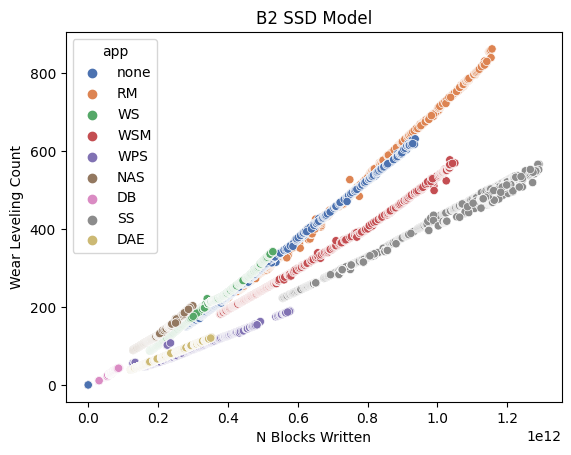

In [19]:
graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

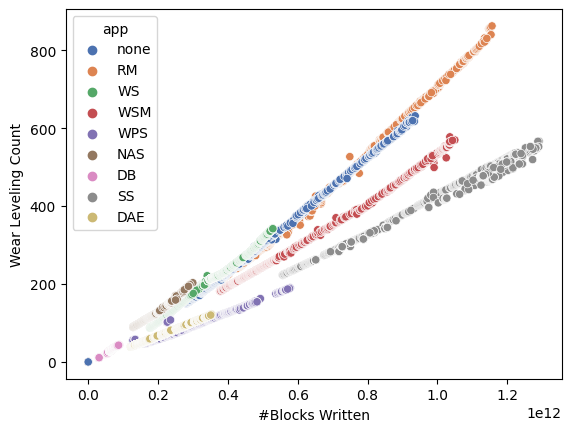

In [10]:
graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Wear Leveling Count")
plt.savefig('img/wearlevelingWritenBlocks.pdf')

In [6]:
group.drop(group[group.w_r_d < 3.25].index, inplace=True)

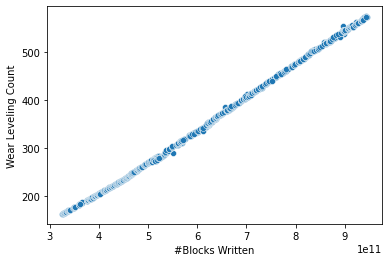

In [7]:
# without consider app

graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Wear Leveling Count")
plt.savefig('img/wearlevelingWritenBlocksWithoutApp.pdf')

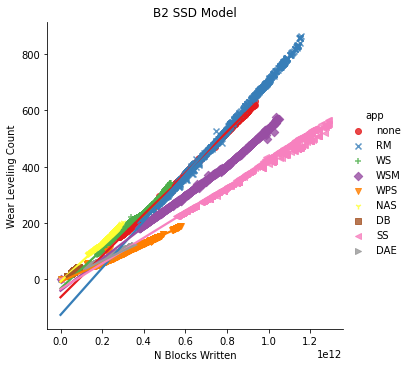

In [5]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

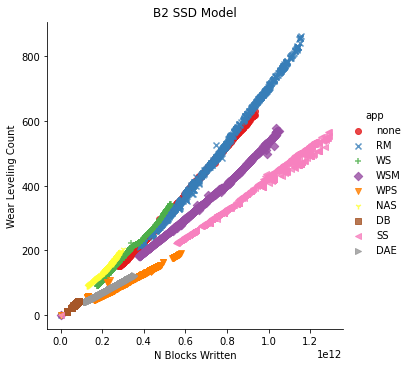

In [6]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

Reallocated Sector x Time

In [11]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['r_sectors'].mean()

In [8]:
group.drop(group[group.r_sectors < 10].index, inplace=True)

In [12]:
group.drop(group[group.r_sectors > 18].index, inplace=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

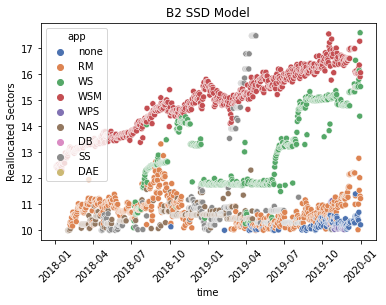

In [13]:
graph = sns.scatterplot(x = "timestamp", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "Reallocated Sectors", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

N Blocks written x Reallocated sector

In [3]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'r_sectors'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3296507595.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'r_sectors'].mean()


In [13]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    6436 non-null   object 
 1   app          6436 non-null   object 
 2   n_b_written  6424 non-null   float64
 3   r_sectors    6424 non-null   float64
dtypes: float64(2), object(2)
memory usage: 201.2+ KB


In [20]:
group.tail()

,timestamp,app,n_b_written,r_sectors
6431,2019-12-31,SS,1.198229e+12,8.442826
6432,2019-12-31,WPS,5.710862e+11,8.896552
6433,2019-12-31,WS,5.286785e+11,15.532558
6434,2019-12-31,WSM,1.043207e+12,16.066338
6435,2019-12-31,none,9.290646e+11,10.218057


In [22]:
group.size

25744

In [4]:
group.drop(group[group.r_sectors > 30].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Reallocated Sectors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

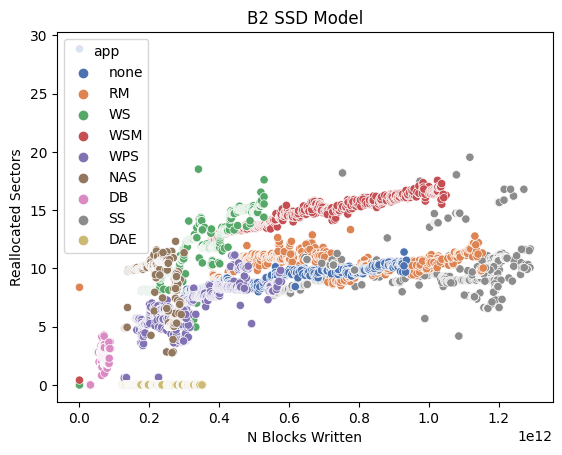

In [5]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

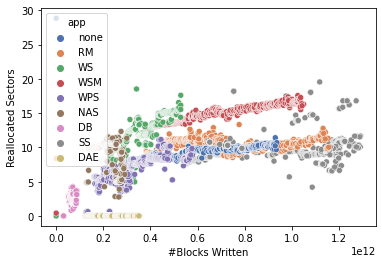

In [24]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Reallocated Sectors")
plt.savefig('img/RSWritenBlocks.pdf')

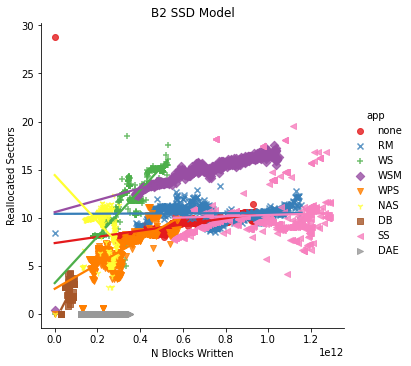

In [8]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

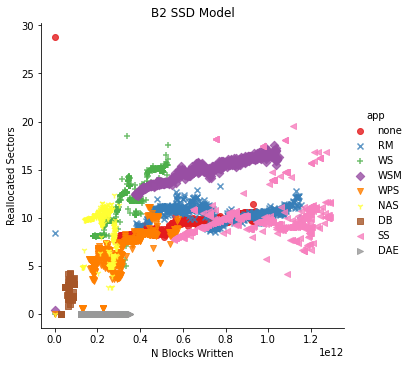

In [9]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

N Blocks written x Uncorrectable Errors

In [2]:
result.drop(result[result.u_errors < 1].index, inplace=True)

In [3]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Uncorrectable Errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

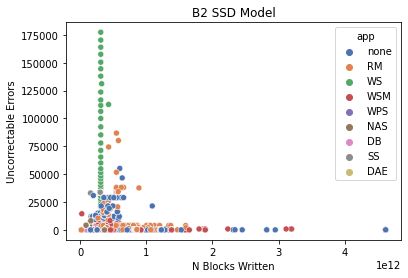

In [5]:
graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Errors", title ='B2 SSD Model')

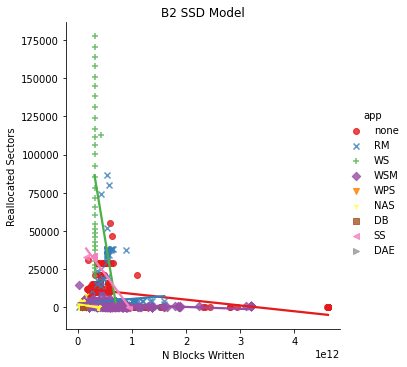

In [6]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Sectors", title ='B2 SSD Model')

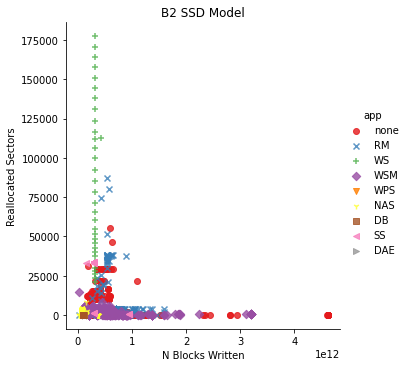

In [7]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Sectors", title ='B2 SSD Model')

In [12]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors'].mean()

/tmp/ipykernel_81299/2965906918.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors', 'unc_write'].sum()


In [8]:
result["unc_write"] = result["u_errors"]/(result["n_b_written"]*524288)

[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'Uncorrectable Errors/N Blocks Written'),
 Text(0.5, 1.0, 'B2 SSD Model')]

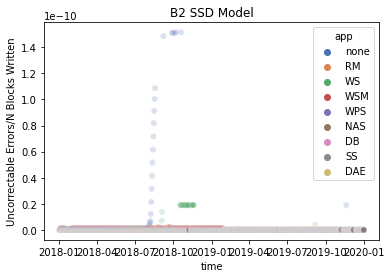

In [13]:
graph = sns.scatterplot(x = "timestamp", y = 'unc_write', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group, alpha=0.2)
graph.set(xlabel ="time", ylabel = "Uncorrectable Errors/N Blocks Written", title ='B2 SSD Model')

N Blocks written x Time

In [2]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

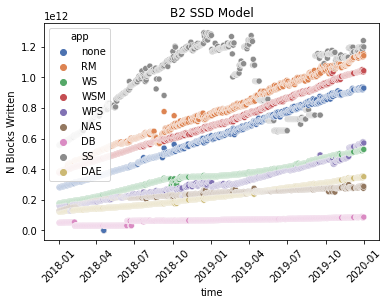

In [9]:
graph = sns.scatterplot(y = "n_b_written", x = 'timestamp', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "N Blocks Written", title ='B2 SSD Model')

#graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.setp(graph.get_xticklabels(), rotation=45)

 SSDs Failure Time

In [9]:
resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d').dt.floor('D')

In [10]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [11]:
groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

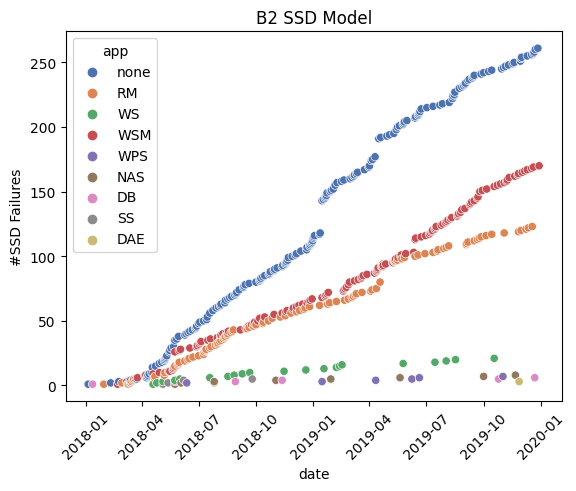

In [12]:
graph = sns.scatterplot(x = "date", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = groupSSDFailures)
graph.set(xlabel ="date", ylabel = "#SSD Failures", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

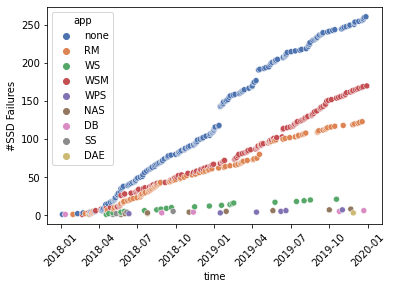

In [43]:
graph = sns.scatterplot(x = "date", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = groupSSDFailures)
graph.set(xlabel ="time", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresTimeScatter.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

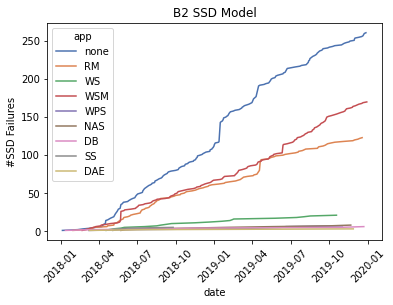

In [95]:
graph = sns.lineplot(x="date", y="cum_sum", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=groupSSDFailures, palette="deep")
graph.set(xlabel ="date", ylabel = "#SSD Failures", title ='B2 SSD Model')

plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

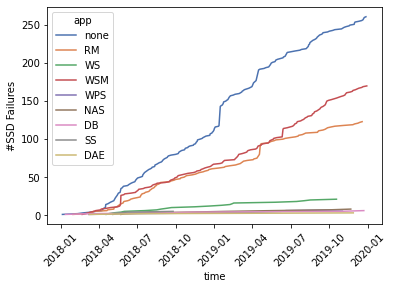

In [44]:
graph = sns.lineplot(x="date", y="cum_sum", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=groupSSDFailures, palette="deep")
graph.set(xlabel ="time", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresTimeLine.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


N Blocks written x SSDs Failures

In [6]:
resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d').dt.floor('D')

In [7]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [62]:
groupSSDFailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     460 non-null    datetime64[ns]
 1   app      460 non-null    object        
 2   disk_id  460 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.9+ KB


In [8]:
groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

In [9]:
groupSSDFailures.rename(columns = {'date':'timestamp'}, inplace=True)

In [10]:
# Using "result" because this is the dataset containing written blocks data

result['timestamp'] = pd.to_datetime(result['timestamp'], format='%Y-%m-%d').dt.floor('D')

In [68]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008712 entries, 0 to 31008711
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0.1  int64         
 1   Unnamed: 0    int64         
 2   disk_id       float64       
 3   timestamp     datetime64[ns]
 4   r_sectors     float64       
 5   n_b_written   float64       
 6   w_r_d         float64       
 7   model_y       object        
 8   app           object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.1+ GB


In [11]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()

In [12]:
# smart attributes added to the dataframe in order to utilize it for the ML model

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written','r_sectors','w_r_d'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/934392082.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written','r_sectors','w_r_d'].mean()


In [74]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6436 non-null   datetime64[ns]
 1   app          6436 non-null   object        
 2   n_b_written  6424 non-null   float64       
 3   r_sectors    6424 non-null   float64       
 4   w_r_d        6424 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 251.5+ KB


In [13]:
resultWriteFailure = pd.merge(group, groupSSDFailures, on=['timestamp', 'app'], how='left')

In [76]:
resultWriteFailure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6436 entries, 0 to 6435
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6436 non-null   datetime64[ns]
 1   app          6436 non-null   object        
 2   n_b_written  6424 non-null   float64       
 3   r_sectors    6424 non-null   float64       
 4   w_r_d        6424 non-null   float64       
 5   disk_id      447 non-null    float64       
 6   cum_sum      447 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 402.2+ KB


In [ ]:
resultWriteFailure.head(30)

[Text(0.5, 0, 'N B Written'), Text(0, 0.5, '#SSD Failures')]

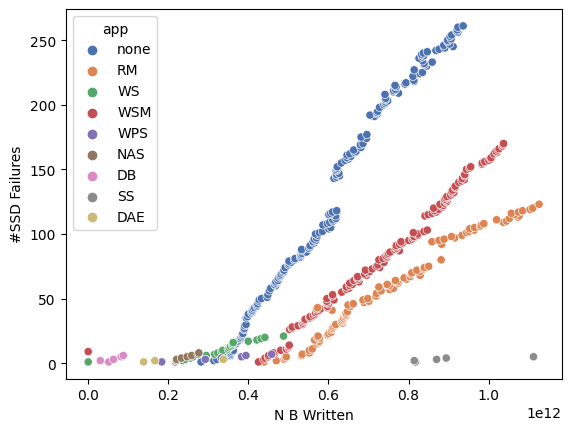

In [14]:
graph = sns.scatterplot(x = "n_b_written", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = resultWriteFailure)
graph.set(xlabel ="N B Written", ylabel = "#SSD Failures")
#plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

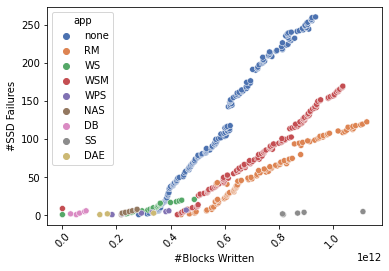

: 

In [ ]:
graph = sns.scatterplot(x = "n_b_written", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = resultWriteFailure)
graph.set(xlabel ="#Blocks Written", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresWritenBlocks.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


In [20]:
# creating datafram to extract values per app for prediction

resultWriteFailureNone = resultWriteFailure.loc[resultWriteFailure.app.isin(["none"])] 
resultWriteFailureWSM = resultWriteFailure.loc[resultWriteFailure.app.isin(["WSM"])] 
resultWriteFailureRM = resultWriteFailure.loc[resultWriteFailure.app.isin(["RM"])] 

In [21]:
resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
resultWriteFailureRM["disk_id"] = resultWriteFailureRM["disk_id"].fillna(0)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3639280157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3639280157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3639280157.py:3: SettingWithCopyWarn

In [40]:
print(len(resultWriteFailureNone),len(resultWriteFailureWSM),len(resultWriteFailureRM))

716 715 716


In [22]:
resultWriteFailureNone['cum_sum'] = resultWriteFailureNone.disk_id.cumsum()
resultWriteFailureWSM['cum_sum'] = resultWriteFailureWSM.disk_id.cumsum()
resultWriteFailureRM['cum_sum'] = resultWriteFailureRM.disk_id.cumsum()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/617921817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone['cum_sum'] = resultWriteFailureNone.disk_id.cumsum()
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/617921817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM['cum_sum'] = resultWriteFailureWSM.disk_id.cumsum()
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/617921817.py:3: SettingWithCopyWarning: 
A val

In [44]:
resultWriteFailureNone.tail(50)

,timestamp,app,n_b_written,r_sectors,w_r_d,disk_id,cum_sum
5994,2019-11-03,none,8.969865e+11,10.268541,592.744042,0.0,243.0
6003,2019-11-04,none,8.856287e+11,10.538826,593.507252,0.0,243.0
6012,2019-11-05,none,9.024248e+11,10.477048,601.852433,1.0,244.0
6021,2019-11-06,none,8.831379e+11,10.256302,583.676498,0.0,244.0
6030,2019-11-07,none,8.869173e+11,10.301004,589.042324,0.0,244.0
6039,2019-11-08,none,8.852290e+11,10.265434,586.283940,0.0,244.0
6048,2019-11-13,none,8.928558e+11,10.238930,592.524215,0.0,244.0
6057,2019-11-14,none,8.913520e+11,10.347744,591.961880,0.0,244.0
6066,2019-11-15,none,8.953776e+11,10.091495,594.400616,0.0,244.0
6075,2019-11-16,none,8.934298e+11,10.280072,593.888961,0.0,244.0


In [23]:
#dynamic mttf - app(None)

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureNone.size

resultWriteFailureNone["AFR_SSDs"] = " "
resultWriteFailureNone["mttf_SDDs"] = " "
resultWriteFailureNone["MTTFMes_SSDs"] = " "
resultWriteFailureNone["MTTFDia_SSDs"] = " "
resultWriteFailureNone["MTTFTest_SSDs"] = " "

for i in range(0, len(resultWriteFailureNone)): 
    

    numberFailedSSDs = resultWriteFailureNone.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(15015-resultWriteFailureNone.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
        MTTFTest_SSDs = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/numberFailedSSDs
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0
        MTTFTest_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs
    
    # converting to string for saving as a csv
    #resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureNone.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','
    #resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = str(MTTFTest_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureNone.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs
    resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = MTTFTest_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/4023182073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/4023182073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/4023182073.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [24]:
resultWriteFailureNone.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2093885582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone.fillna(0, inplace=True)


In [49]:
resultWriteFailureNone.tail(100)

,timestamp,app,n_b_written,r_sectors,w_r_d,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs,MTTFTest_SSDs
5544,2019-09-14,none,8.364111e+11,10.010992,554.223723,0.0,235.0,0.009232,948855.035461,1299.801418,39535.626478,2.638298
5553,2019-09-15,none,8.324314e+11,10.039867,549.618893,1.0,236.0,0.009257,946358.389831,1296.381356,39431.599576,2.631356
5562,2019-09-16,none,8.368280e+11,10.134703,552.678823,1.0,237.0,0.009281,943818.950774,1292.902672,39325.789616,2.624473
5571,2019-09-17,none,8.753159e+11,10.465155,578.749832,0.0,237.0,0.009267,945272.379747,1294.893671,39386.349156,2.628692
5580,2019-09-18,none,8.645079e+11,10.116243,571.376854,0.0,237.0,0.009252,946789.670886,1296.972152,39449.56962,2.632911
...,...,...,...,...,...,...,...,...,...,...,...,...
6399,2019-12-27,none,9.362144e+11,10.698976,631.708087,1.0,256.0,0.008624,1015749.375,1391.4375,42322.890625,2.828125
6408,2019-12-28,none,9.194166e+11,9.735392,615.260855,0.0,256.0,0.008613,1017083.43099,1393.264974,42378.476291,2.832031
6417,2019-12-29,none,9.253141e+11,9.701389,617.181583,0.0,256.0,0.008601,1018486.304687,1395.186719,42436.929362,2.835938
6426,2019-12-30,none,9.337833e+11,9.679375,617.629916,0.0,256.0,0.008589,1019889.178385,1397.108464,42495.382433,2.839844


In [51]:
resultWriteFailureNone.head()


,timestamp,app,n_b_written,r_sectors,w_r_d,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs,MTTFTest_SSDs
2,2018-01-01,none,0.000000e+00,0.000000,0.000000,0.0,0.0,0,0,0,0,0
11,2018-01-02,none,0.000000e+00,0.000000,0.000000,0.0,0.0,0,0,0,0,0
20,2018-01-03,none,2.812087e+11,7.884492,150.180418,0.0,0.0,0,0,0,0,0
29,2018-01-04,none,2.816459e+11,7.886817,150.485215,0.0,0.0,0,0,0,0,0
38,2018-01-05,none,2.819011e+11,7.897597,150.971222,1.0,1.0,0.007992,1096095.0,1501.5,45670.625,3.0


In [56]:
# saving dataset 

resultWriteFailureNone.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'None' + '.csv')

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3495951188.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureNone)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

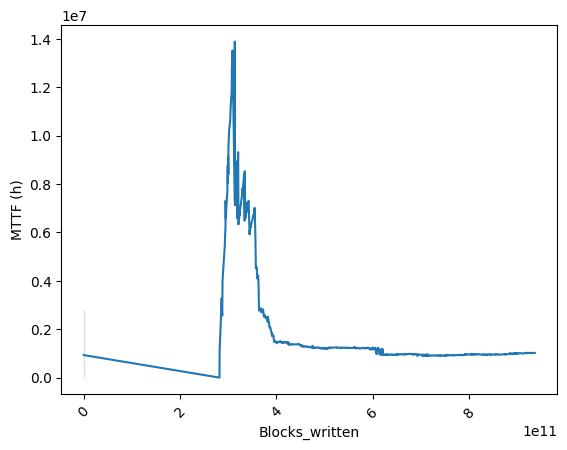

In [25]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureNone)
graph.set(xlabel ="Blocks_written", ylabel = "MTTF (h)")
#plt.setp(graph.get_xticklabels(), rotation=45)
plt.savefig('img/mttfNBWrittenNone.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_3973/410778016.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureNone)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

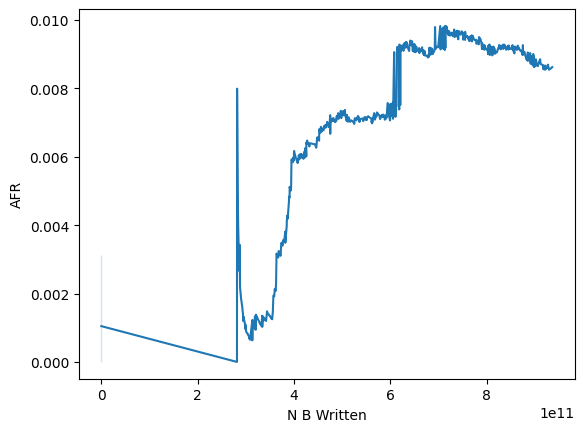

In [48]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureNone)
graph.set(xlabel ="N B Written", ylabel = "AFR")
#plt.setp(graph.get_xticklabels(), rotation=45)

In [44]:
#In case should necessary drop out some values (e.g., weird patterns)

resultWriteFailureNone.drop(resultWriteFailureNone[resultWriteFailureNone.n_b_written > (4.5*(10**11))].index, inplace=True)

In [45]:
resultWriteFailureNone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     198 non-null    int64  
 1   timestamp      198 non-null    object 
 2   app            198 non-null    object 
 3   n_b_written    198 non-null    float64
 4   r_sectors      198 non-null    float64
 5   w_r_d          198 non-null    float64
 6   disk_id        198 non-null    float64
 7   cum_sum        198 non-null    float64
 8   AFR_SSDs       198 non-null    float64
 9   mttf_SDDs      198 non-null    float64
 10  MTTFMes_SSDs   198 non-null    float64
 11  MTTFDia_SSDs   198 non-null    float64
 12  MTTFTest_SSDs  198 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.2+ KB


In [26]:
#dynamic mttf - RM

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureRM.size

resultWriteFailureRM["AFR_SSDs"] = " "
resultWriteFailureRM["mttf_SDDs"] = " "
resultWriteFailureRM["MTTFMes_SSDs"] = " "
resultWriteFailureRM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureRM)): 
    

    numberFailedSSDs = resultWriteFailureRM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureRM.timestamp.iloc[i] - resultWriteFailureRM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(8015-resultWriteFailureRM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs

    # converting to string for saving as a csv
    #resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureRM.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureRM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3960862930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3960862930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/3960862930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [115]:
resultWriteFailureRM.head()

,timestamp,app,n_b_written,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs
0,2018-01-01,RM,NaN,0.0,0.0,0,0,0,0
6,2018-01-02,RM,NaN,0.0,0.0,0,0,0,0
15,2018-01-03,RM,3.824297e+11,0.0,0.0,0,0,0,0
24,2018-01-04,RM,3.838148e+11,0.0,0.0,0,0,0,0
33,2018-01-05,RM,3.856599e+11,0.0,0.0,0,0,0,0


In [27]:
resultWriteFailureRM.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/1168983232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM.fillna(0, inplace=True)


In [67]:
# saving dataset 

resultWriteFailureRM.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'RM' + '.csv')

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_71866/3718903493.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureRM)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

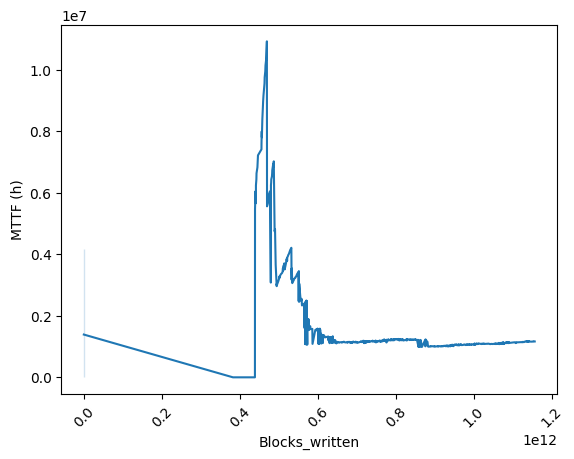

In [30]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureRM)
graph.set(xlabel ="Blocks_written", ylabel = "MTTF (h)")
plt.savefig('img/mttfNBWrittenRM.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_3973/3467782973.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureRM)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

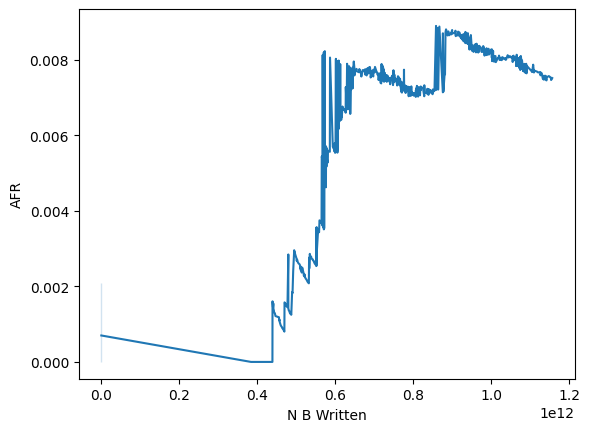

In [33]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureRM)
graph.set(xlabel ="N B Written", ylabel = "AFR")

In [ ]:
#In case should necessary drop out some values (e.g., weird patterns)

resultWriteFailureRM.drop(resultWriteFailureRM[resultWriteFailureRM.n_b_written > (4.5*(10**11))].index, inplace=True)

In [28]:
#dynamic mttf - WSM

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureWSM.size

resultWriteFailureWSM["AFR_SSDs"] = " "
resultWriteFailureWSM["mttf_SDDs"] = " "
resultWriteFailureWSM["MTTFMes_SSDs"] = " "
resultWriteFailureWSM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureWSM)): 
    

    numberFailedSSDs = resultWriteFailureWSM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureWSM.timestamp.iloc[i] - resultWriteFailureWSM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(18036-resultWriteFailureWSM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs

    # converting to string for saving as a csv
    #resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureWSM.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureWSM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2647751264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2647751264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2647751264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [29]:
resultWriteFailureWSM.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/264770996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM.fillna(0, inplace=True)


In [66]:
# saving dataset 

resultWriteFailureWSM.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'WSM' + '.csv')

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_2195/2958807828.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureWSM)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

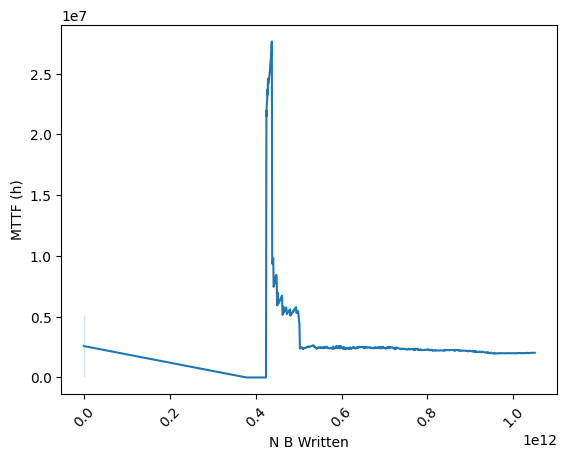

In [30]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureWSM)
graph.set(xlabel ="N B Written", ylabel = "MTTF (h)")
plt.savefig('img/mttfNBWrittenWSM.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_3973/3959762646.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureWSM)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

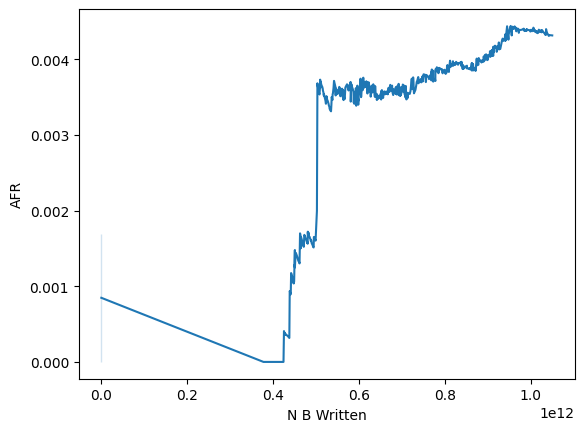

In [97]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureWSM)
graph.set(xlabel ="N B Written", ylabel = "AFR")

In [89]:
#In case should necessary drop out some values (e.g., weird patterns)

resultWriteFailureWSM.drop(resultWriteFailureWSM[resultWriteFailureWSM.n_b_written > (0.45*(10**12))].index, inplace=True)
resultWriteFailureWSM.drop(resultWriteFailureWSM[resultWriteFailureWSM.n_b_written < (0.42*(10**12))].index, inplace=True)

In [69]:
print(len(resultWriteFailureNone),len(resultWriteFailureWSM),len(resultWriteFailureRM))

716 715 716


In [96]:
# Loading extracted metrics datasets for training the models
resultWriteFailureNone = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'None' + '.csv')
resultWriteFailureRM = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'RM' + '.csv')
resultWriteFailureWSM = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'WSM' + '.csv')

In [83]:
resultWriteFailureNone.head()

,timestamp,app,n_b_written,r_sectors,w_r_d,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs,MTTFTest_SSDs
2,2018-01-01,none,0.000000e+00,0.000000,0.000000,0.0,0.0,0,0,0,0,0
11,2018-01-02,none,0.000000e+00,0.000000,0.000000,0.0,0.0,0,0,0,0,0
20,2018-01-03,none,2.812087e+11,7.884492,150.180418,0.0,0.0,0,0,0,0,0
29,2018-01-04,none,2.816459e+11,7.886817,150.485215,0.0,0.0,0,0,0,0,0
38,2018-01-05,none,2.819011e+11,7.897597,150.971222,1.0,1.0,0.007992,1096095.0,1501.5,45670.625,3.0


In [ ]:
## Model training for None app

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureNone

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse in zip(models * 2, mae_scores, mse_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersNone.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()



In [ ]:
## Model training for RM app

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureRM

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse in zip(models * 2, mae_scores, mse_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersRM.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


Epoch 1/10
1/1 - 1s - loss: 0.0630 - val_loss: 0.0023 - 1s/epoch - 1s/step
Epoch 2/10
1/1 - 0s - loss: 0.0023 - val_loss: 0.0169 - 11ms/epoch - 11ms/step
Epoch 3/10
1/1 - 0s - loss: 0.0170 - val_loss: 0.0110 - 12ms/epoch - 12ms/step
Epoch 4/10
1/1 - 0s - loss: 0.0111 - val_loss: 0.0028 - 15ms/epoch - 15ms/step
Epoch 5/10
1/1 - 0s - loss: 0.0029 - val_loss: 6.7666e-06 - 17ms/epoch - 17ms/step
Epoch 6/10
1/1 - 0s - loss: 5.8745e-06 - val_loss: 0.0022 - 14ms/epoch - 14ms/step
Epoch 7/10
1/1 - 0s - loss: 0.0022 - val_loss: 0.0051 - 12ms/epoch - 12ms/step
Epoch 8/10
1/1 - 0s - loss: 0.0050 - val_loss: 0.0052 - 13ms/epoch - 13ms/step
Epoch 9/10
1/1 - 0s - loss: 0.0052 - val_loss: 0.0029 - 13ms/epoch - 13ms/step
Epoch 10/10
1/1 - 0s - loss: 0.0029 - val_loss: 5.3834e-04 - 13ms/epoch - 13ms/step
1/1 [==============================] - 0s 9ms/step


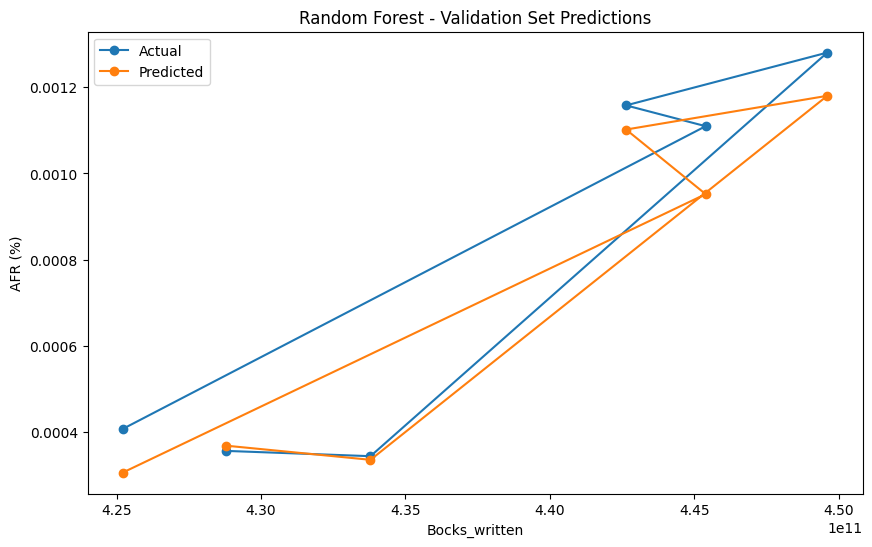

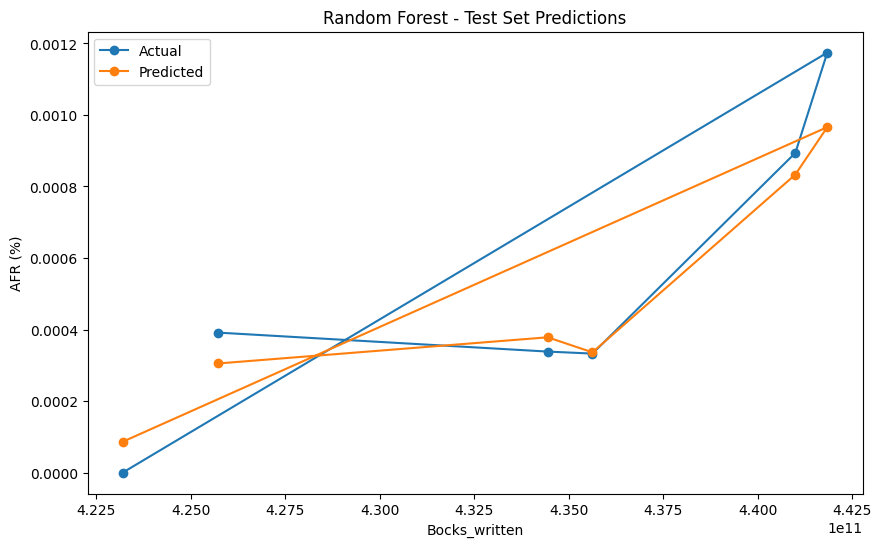

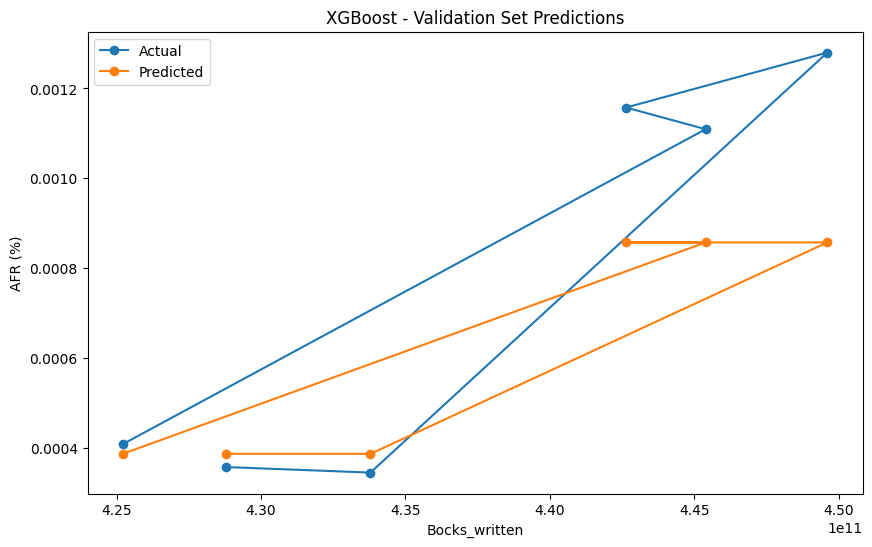

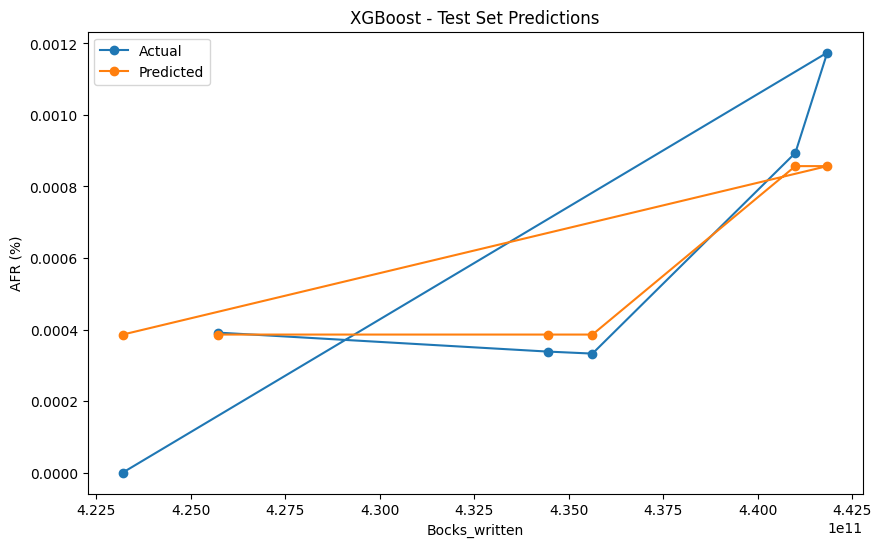

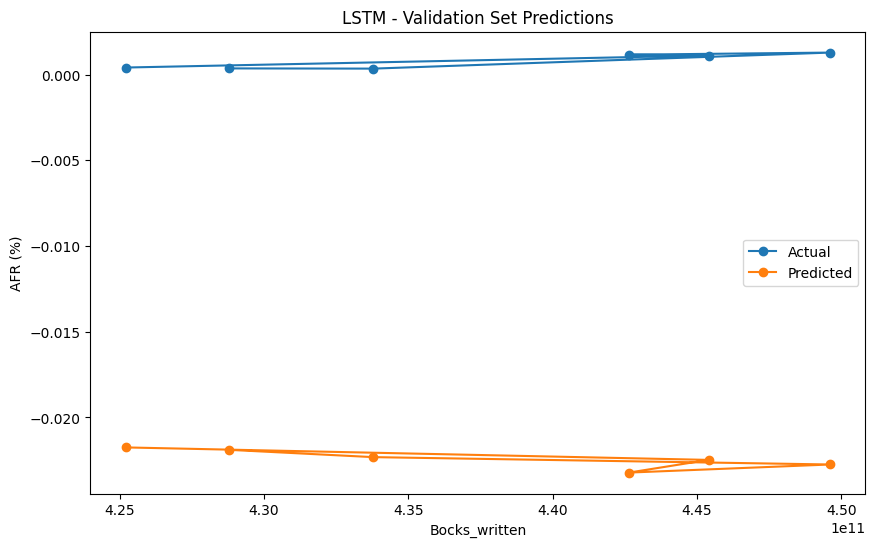

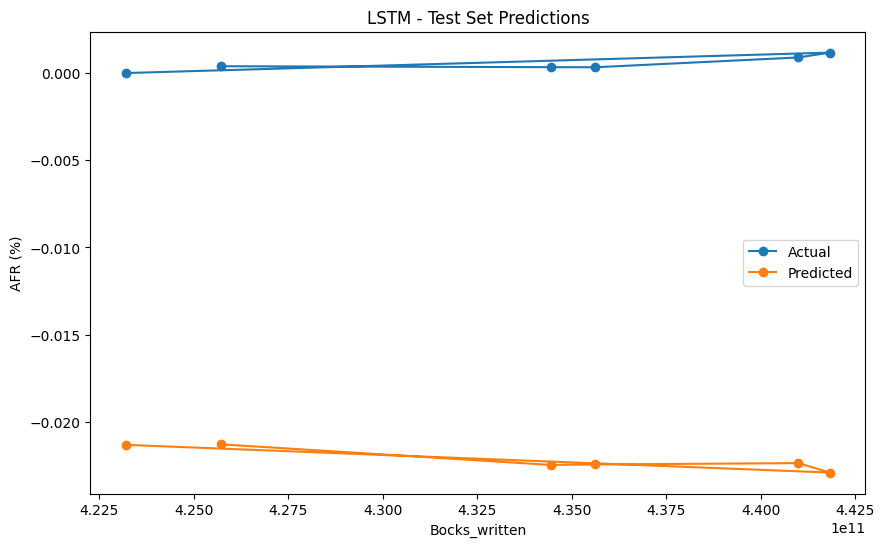

Random Forest Equation:
n_b_written * 0.4276 + r_sectors * 0.1680 + w_r_d * 0.4045 + 
XGBoost Equation:
n_b_written * 1.0000 + r_sectors * 0.0000 + w_r_d * 0.0000 + 
LSTM Model Summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
## Model training for WSM app

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureWSM

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse in zip(models * 2, mae_scores, mse_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersWSM.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


In [102]:
# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")


Random Forest Equation:
n_b_written * 0.4762 + r_sectors * 0.0071 + w_r_d * 0.5167 + 
XGBoost Equation:
n_b_written * 0.5668 + r_sectors * 0.2224 + w_r_d * 0.2109 + 

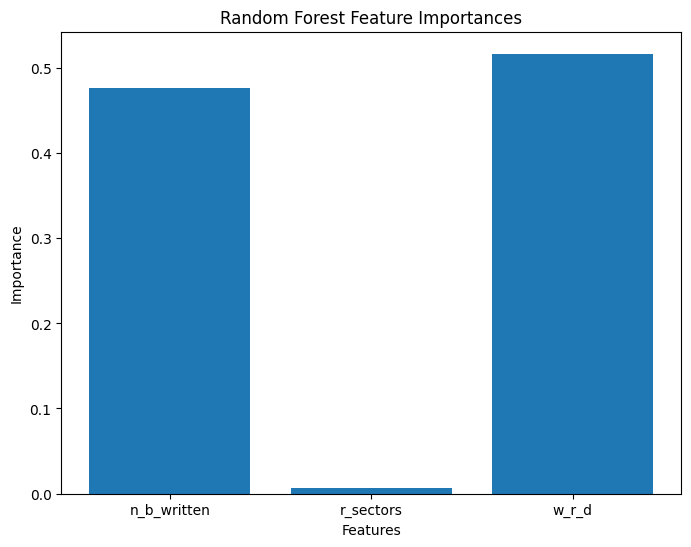

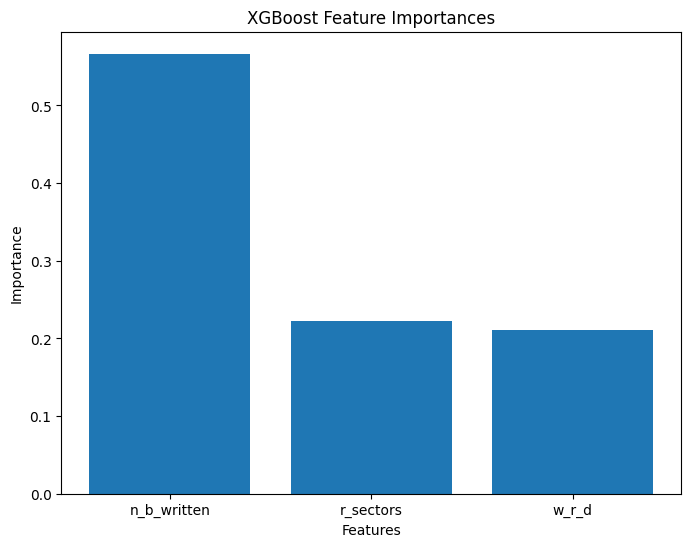

In [103]:
# Plot feature importances for Random Forest
plt.figure(figsize=(8, 6))
plt.bar(X.columns, rf_feature_importances)
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plot feature importances for XGBoost
plt.figure(figsize=(8, 6))
plt.bar(X.columns, xgb_feature_importances)
plt.title('XGBoost Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [155]:
## Saving models for later *** (change the app name in the code)

import joblib

appName = 'WSM'

# Assuming you have trained models named best_rf_model, best_xgb_model, and lstm_model

# Save Random Forest model
joblib.dump(best_rf_model, 'best_rf_model' + appName + '.joblib')

# Save XGBoost model
joblib.dump(best_xgb_model, 'best_xgb_model' + appName + '.joblib')

# Save LSTM model
lstm_model.save('lstm_model' + appName + '.h5')  # Assuming lstm_model is a Keras model


In [99]:
# Loading models *** (change the app name in the code)

import joblib

appName = 'WSM'

# Loading the respective app dataset to create variables so that will possible to work with the ML model from here on.
df = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + appName + '.csv')

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')

# Load Random Forest model
best_rf_model = joblib.load('best_rf_model' + appName + '.joblib')

# Load XGBoost model
best_xgb_model = joblib.load('best_xgb_model' + appName + '.joblib')

# Load LSTM model
from keras.models import load_model
lstm_model = load_model('lstm_model' + appName + '.h5')

4/4 [==============================] - 0s 938us/step


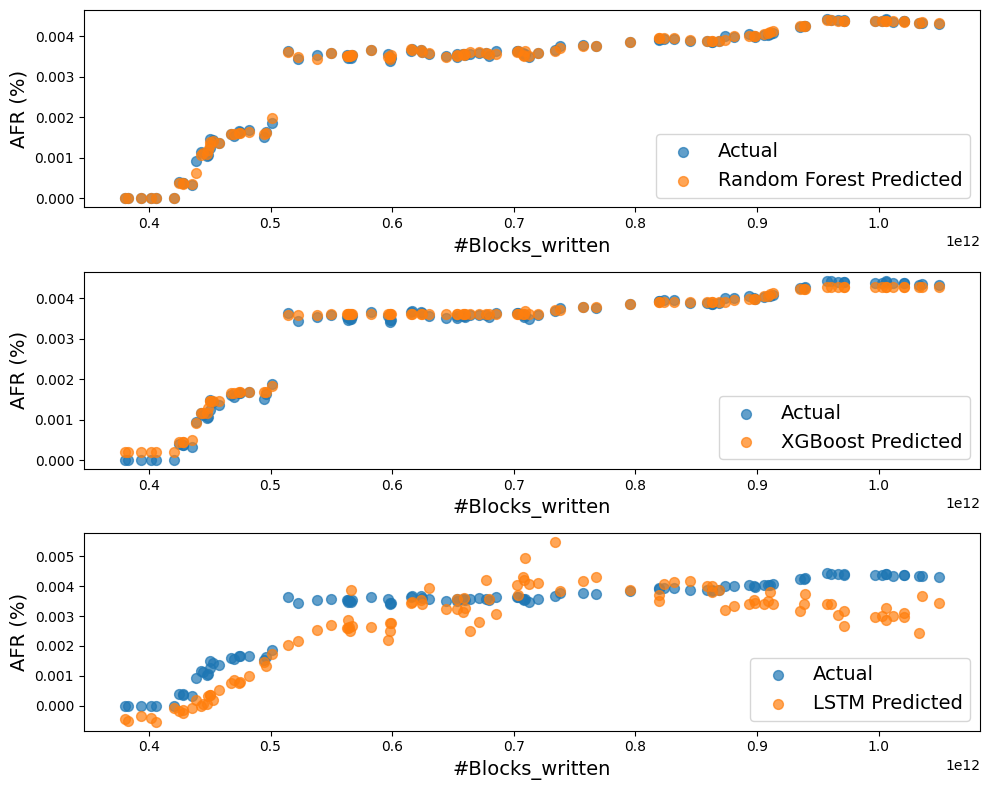

4/4 [==============================] - 0s 1ms/step


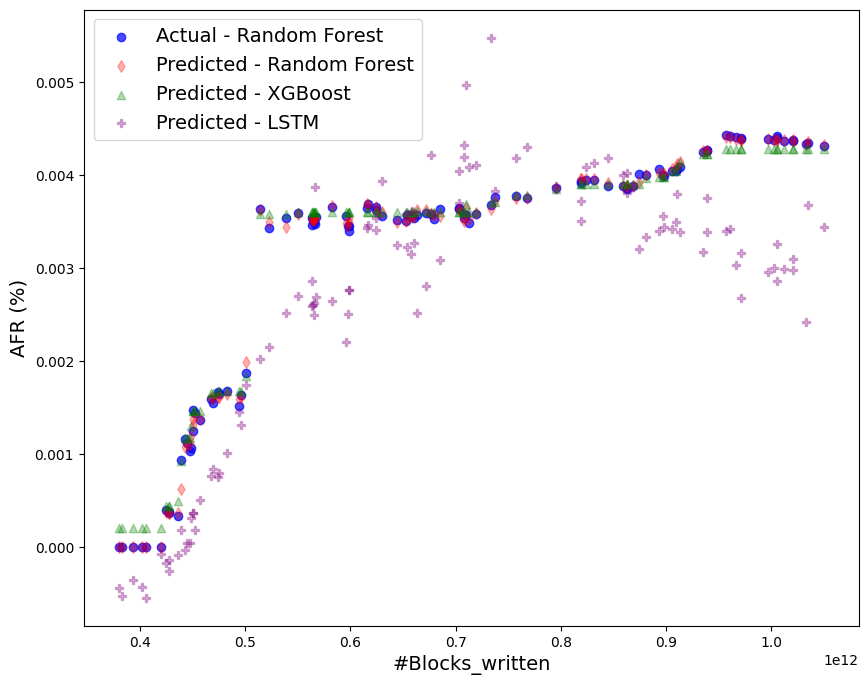

In [100]:
## Plotting validation results against predictions per algorithm

# Plotting all target variable values and predictions in 3 subfigures
plt.figure(figsize=(10, 8)) # Adjust width and height

# Plot Random Forest 
plt.subplot(3, 1, 1)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_rf_model.predict(X_val), label='Random Forest Predicted', marker='o', alpha=0.7, s=50)
#plt.title('Random Forest - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)

# Plot XGBoost
plt.subplot(3, 1, 2)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_xgb_model.predict(X_val), label='XGBoost Predicted', marker='o', alpha=0.7, s=50)
#plt.title('XGBoost - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)

# Plot LSTM
plt.subplot(3, 1, 3)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], lstm_model.predict(X_val_lstm).flatten(), label='LSTM Predicted', marker='o', alpha=0.7, s=50)
#plt.title('LSTM - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)

plt.tight_layout()


# Save the figure in PDF format (remember to change the app name)
plt.savefig('img/MLEvaluationWSM_3Figure.pdf')
plt.show()

# Plotting all target variable values and predictions in one single figure
plt.figure(figsize=(10, 8)) # Adjust width and height

# Plot Random Forest
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual - Random Forest', marker='o', color='blue', alpha=0.7)
plt.scatter(X_val.iloc[:, 0], best_rf_model.predict(X_val), label='Predicted - Random Forest', marker='d', color='red', alpha=0.3)

# Plot XGBoost
plt.scatter(X_val.iloc[:, 0], best_xgb_model.predict(X_val), label='Predicted - XGBoost', marker='^', color='green', alpha=0.3)

# Plot LSTM
plt.scatter(X_val.iloc[:, 0], lstm_model.predict(X_val_lstm).flatten(), label='Predicted - LSTM', marker='P', color='purple', alpha=0.3)

#plt.title('Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)


# Save the figure in PDF format
plt.savefig('img/MLEvaluationWSM' + appName + '_1Figure.pdf')
plt.show()

1/1 [==============================] - 0s 10ms/step


/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

1/1 [==============================] - 0s 8ms/step


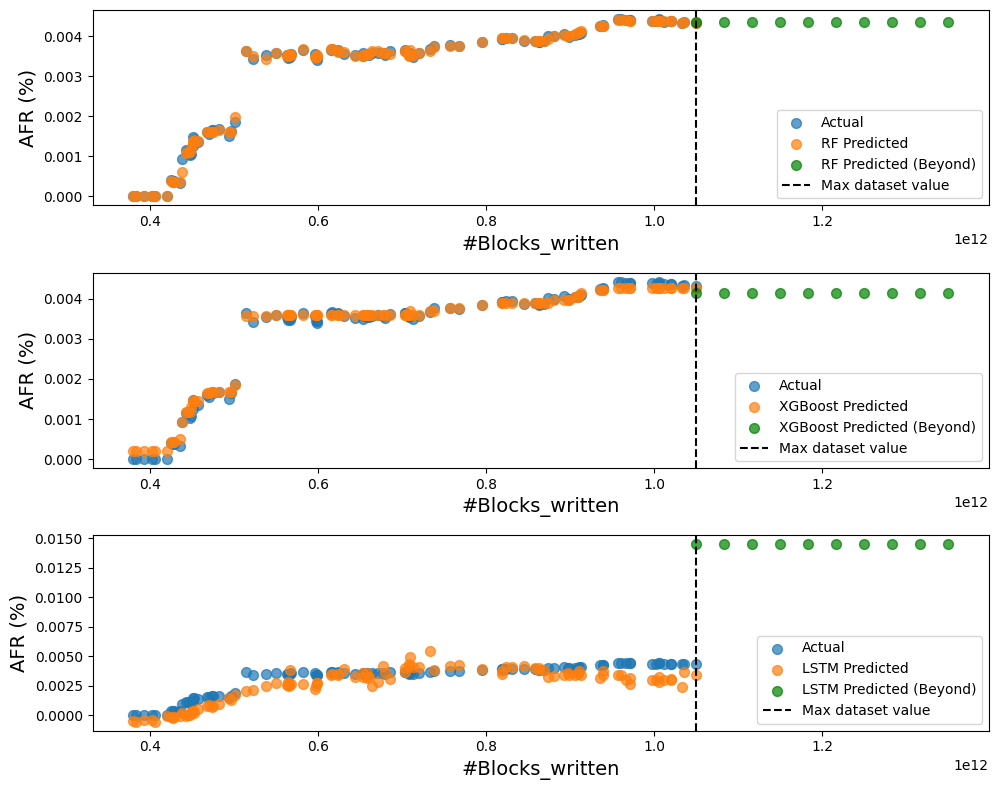

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming you have defined your models and data (best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds, X_val, y_val) earlier
appName = 'WSM'

# Set the maximum prediction value for the green line
max_pred_value = 1.35 * 10**12  # Change this value according to your requirements

# Generate num_values equidistant values between X_val.iloc[:, 0].max() and max_pred_value
num_values = 10
pred_values = np.linspace(X_val.iloc[:, 0].max(), max_pred_value, num=num_values)

# Plotting all target variable values and predictions in 3 subfigures
plt.figure(figsize=(10, 8))  # Adjust width and height

best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

# Plot Random Forest
plt.subplot(3, 1, 1)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_rf_val_preds, label='RF Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [best_rf_model.predict(np.array([[value, 10000.116243, 5710000.376854]]).reshape(1, 3))[0] for value in pred_values],
            label='RF Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
#plt.legend(handles=[legend_line], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

# Plot XGBoost
plt.subplot(3, 1, 2)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_xgb_val_preds, label='XGBoost Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [best_xgb_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3))[0] for value in pred_values],
            label='XGBoost Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

# Plot LSTM
plt.subplot(3, 1, 3)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_lstm_val_preds, label='LSTM Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [lstm_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3, 1))[0, 0] for value in pred_values],
            label='LSTM Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

plt.tight_layout()

# Save the figure in PDF format (remember to change the app name)
plt.savefig('img/MLEvaluation' + appName + '_3FigureBeyond.pdf', bbox_inches='tight')
plt.show()


In [63]:
## Getting predictions for a certain point

# Function to provide inputs for the model and get predictions
def get_predictions(model, X_input):
    if hasattr(model, 'predict'):  # Check if the model has a predict method
        return model.predict(X_input)
    elif isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
        X_input_lstm = np.reshape(X_input.values, (X_input.shape[0], X_input.shape[1], 1)).astype('float32')
        return model.predict(X_input_lstm).flatten()
    else:
        raise ValueError("Unsupported model type")

# Example usage for the best RandomForestRegressor model
input_data_rf = pd.DataFrame({'n_b_written': [8.645079e+11], 'r_sectors': [10.116243], 'w_r_d': [571.376854]})
rf_predictions = get_predictions(best_rf_model, input_data_rf)
print("Random Forest Predictions:", rf_predictions)

'''
# Example usage for the best XGBRegressor model
input_data_xgb = pd.DataFrame({'n_b_written': [your_value], 'r_sectors': [your_value], 'w_r_d': [your_value]})
xgb_predictions = get_predictions(best_xgb_model, input_data_xgb)
print("XGBoost Predictions:", xgb_predictions)

# Example usage for the best LSTM model
input_data_lstm = pd.DataFrame({'n_b_written': [your_value], 'r_sectors': [your_value], 'w_r_d': [your_value]})
lstm_predictions = get_predictions(lstm_model, input_data_lstm)
print("LSTM Predictions:", lstm_predictions)
'''

Random Forest Predictions: [0.00772174]


'\n# Example usage for the best XGBRegressor model\ninput_data_xgb = pd.DataFrame({\'n_b_written\': [your_value], \'r_sectors\': [your_value], \'w_r_d\': [your_value]})\nxgb_predictions = get_predictions(best_xgb_model, input_data_xgb)\nprint("XGBoost Predictions:", xgb_predictions)\n\n# Example usage for the best LSTM model\ninput_data_lstm = pd.DataFrame({\'n_b_written\': [your_value], \'r_sectors\': [your_value], \'w_r_d\': [your_value]})\nlstm_predictions = get_predictions(lstm_model, input_data_lstm)\nprint("LSTM Predictions:", lstm_predictions)\n'

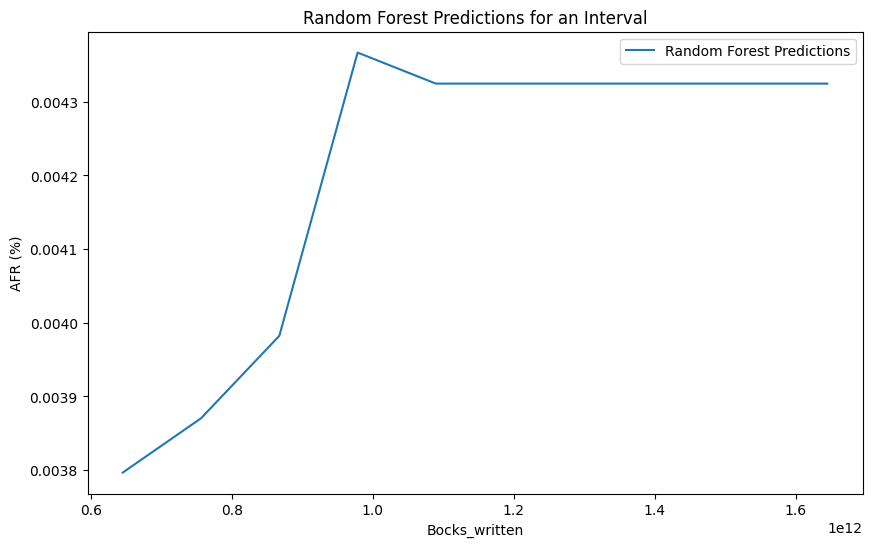

"\n# Example usage for the best XGBRegressor model\nxgb_predictions_interval = get_predictions_for_interval(best_xgb_model, feature_range)\n\n# Plotting the results for the XGBRegressor model\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, xgb_predictions_interval, label='XGBoost Predictions')\nplt.title('XGBoost Predictions for an Interval')\nplt.xlabel('Bocks_written')\nplt.ylabel('AFR (%)')\nplt.legend()\nplt.show()\n\n\n# Example usage for the best LSTM model\nlstm_predictions_interval = get_predictions_for_interval_lstm(lstm_model, feature_range)\n\n# Plotting the results for the LSTM model\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, lstm_predictions_interval, label='LSTM Predictions')\nplt.title('LSTM Predictions for an Interval')\nplt.xlabel('Bocks_written')\nplt.ylabel('AFR (%)')\nplt.legend()\nplt.show()\n"

In [158]:
## Getting predictions for an interval


def get_predictions_for_interval(model, X_interval):
    predictions = []
    for value in X_interval:
        input_data = pd.DataFrame({'n_b_written': [value], 'r_sectors': [10.116243], 'w_r_d': [571.376854]})
        prediction = get_predictions(model, input_data)
        predictions.append(prediction)
    return np.array(predictions)


def get_predictions_for_interval_lstm(model, X_interval):
    predictions = []
    for value in X_interval:
        input_data = np.reshape(np.array([[value, 10.116243, 571.376854]]), (1, 3, 1))
        prediction = model.predict(input_data)[0][0]
        predictions.append(prediction)
    return np.array(predictions)


# Set the range of values for the feature
feature_range = np.linspace(0.645079e+12, 1.645079e+12, 10)


# Example usage for the best RandomForestRegressor model
rf_predictions_interval = get_predictions_for_interval(best_rf_model, feature_range)

# Plotting the results for the RandomForestRegressor model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, rf_predictions_interval, label='Random Forest Predictions')
plt.title('Random Forest Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()


'''
# Example usage for the best XGBRegressor model
xgb_predictions_interval = get_predictions_for_interval(best_xgb_model, feature_range)

# Plotting the results for the XGBRegressor model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, xgb_predictions_interval, label='XGBoost Predictions')
plt.title('XGBoost Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()


# Example usage for the best LSTM model
lstm_predictions_interval = get_predictions_for_interval_lstm(lstm_model, feature_range)

# Plotting the results for the LSTM model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, lstm_predictions_interval, label='LSTM Predictions')
plt.title('LSTM Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()
'''